In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
churn = pd.read_csv('churnHN_sample6.csv')

In [231]:
churn.head()

,driver_id,onboard_week,churn,age,competitor,income,suspensions
0,94069,18,0,22,0,5346000.0,3.0
1,85785,14,0,23,1,3236400.0,NaN
2,89141,15,1,30,1,137600.0,NaN
3,90442,16,0,30,1,176000.0,NaN
4,94962,19,0,26,1,383200.0,NaN


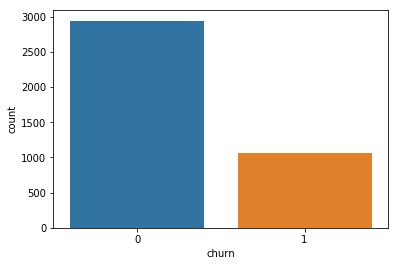

In [232]:
sns.countplot(data=churn, x='churn')

In [234]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
driver_id,4007.0,9.253304e+04,4.240257e+03,83996.0,88967.0,93030.0,96048.0,99420.0
onboard_week,4007.0,1.723933e+01,2.203313e+00,13.0,15.0,18.0,19.0,20.0
churn,4007.0,2.655353e-01,4.416729e-01,0.0,0.0,0.0,1.0,1.0
age,4007.0,2.719641e+01,7.388891e+00,18.0,22.0,25.0,30.0,66.0
competitor,4007.0,7.851260e-01,4.107861e-01,0.0,1.0,1.0,1.0,1.0
income,4007.0,2.862035e+06,2.859791e+06,8800.0,628600.0,1949600.0,4243000.0,16242800.0
suspensions,1253.0,3.465283e+00,1.468449e+00,1.0,3.0,3.0,4.0,15.0


In [235]:
from sklearn.preprocessing import Normalizer

In [239]:
churn.isnull().sum()

driver_id       0
onboard_week    0
churn           0
age             0
competitor      0
income          0
suspensions     0
dtype: int64

In [240]:
churn.columns

Index(['driver_id', 'onboard_week', 'churn', 'age', 'competitor', 'income',
       'suspensions'],
      dtype='object')

In [238]:
churn['suspensions'] = churn['suspensions'].fillna(value=0)

In [23]:
#allocation= allocation.dropna(subset=['unutilized_SH','CR'])

In [100]:
# churn['income']=pd.to_numeric(churn['income'].str.strip().str.replace(',',''))

In [241]:
df_X = churn.drop(columns=['driver_id','onboard_week', 'churn'])
y = churn['churn']

In [242]:
df_X.shape

(4007, 4)

In [243]:
transformer = Normalizer().fit(df_X)
X=transformer.transform(df_X)

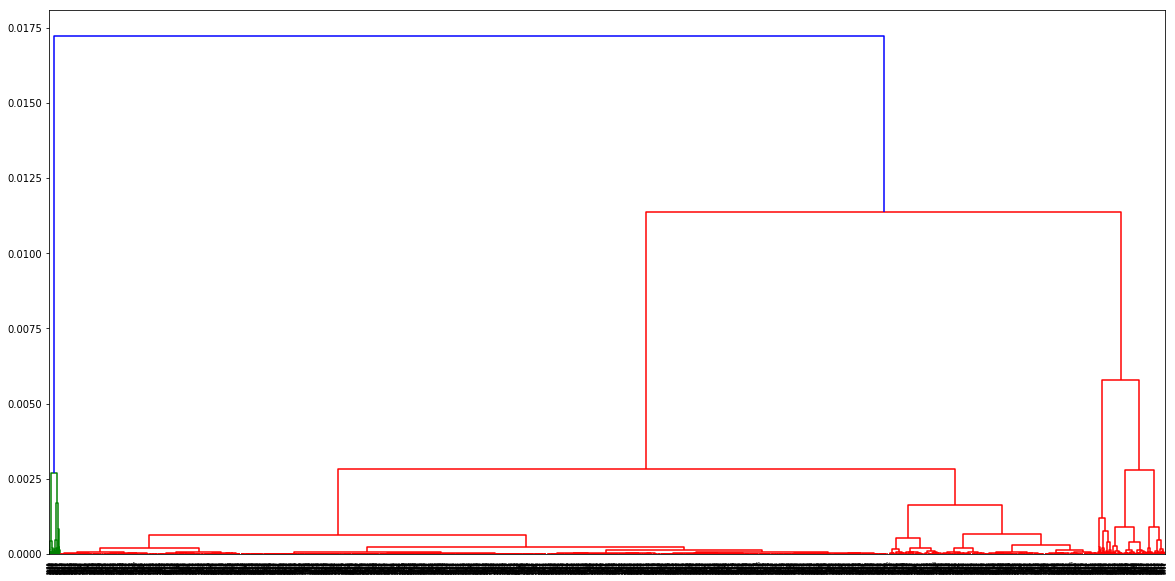

In [244]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

In [245]:
from sklearn.cluster import AgglomerativeClustering

In [246]:
agg = AgglomerativeClustering(n_clusters=4).fit(X)

In [247]:
agg.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [248]:
df_X['cluster'] = agg.labels_

In [249]:
df_X[df_X['cluster'] == 2].describe()

,age,competitor,income,suspensions,cluster
count,191.000000,191.000000,191.000000,191.000000,191.0
mean,26.743455,0.842932,70747.643979,0.136126,2.0
std,6.313073,0.364821,29240.199117,0.515347,0.0
min,19.000000,0.000000,24800.000000,0.000000,2.0
25%,22.000000,1.000000,46400.000000,0.000000,2.0
50%,25.000000,1.000000,66400.000000,0.000000,2.0
75%,29.000000,1.000000,90800.000000,0.000000,2.0
max,51.000000,1.000000,191600.000000,4.000000,2.0


In [250]:
df_X[df_X['cluster'] == 1].describe()

,age,competitor,income,suspensions,cluster
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,29.000000,0.921053,14715.789474,0.105263,1.0
std,5.840215,0.273276,4169.550259,0.311012,0.0
min,21.000000,0.000000,8800.000000,0.000000,1.0
25%,25.250000,1.000000,10600.000000,0.000000,1.0
50%,28.000000,1.000000,14400.000000,0.000000,1.0
75%,32.000000,1.000000,17400.000000,0.000000,1.0
max,44.000000,1.000000,24000.000000,1.000000,1.0


In [251]:
df_X[df_X['cluster'] == 3].describe()

,age,competitor,income,suspensions,cluster
count,49.000000,49.000000,49.000000,49.000000,49.0
mean,27.224490,0.836735,25502.040816,0.040816,3.0
std,6.131426,0.373438,6104.932766,0.199915,0.0
min,19.000000,0.000000,14400.000000,0.000000,3.0
25%,23.000000,1.000000,21600.000000,0.000000,3.0
50%,26.000000,1.000000,25600.000000,0.000000,3.0
75%,30.000000,1.000000,28800.000000,0.000000,3.0
max,50.000000,1.000000,46400.000000,1.000000,3.0


In [252]:
df_X[df_X['cluster'] == 4].describe()

,age,competitor,income,suspensions,cluster
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [253]:
df_X[df_X['cluster'] == 0].describe()

,age,competitor,income,suspensions,cluster
count,3729.000000,3729.000000,3.729000e+03,3729.000000,3729.0
mean,27.200858,0.780102,3.071293e+06,1.155806,0.0
std,7.467895,0.414233,2.856022e+06,1.846037,0.0
min,18.000000,0.000000,8.880000e+04,0.000000,0.0
25%,22.000000,1.000000,8.216000e+05,0.000000,0.0
50%,25.000000,1.000000,2.206000e+06,0.000000,0.0
75%,30.000000,1.000000,4.470000e+06,3.000000,0.0
max,66.000000,1.000000,1.624280e+07,15.000000,0.0


In [254]:
from collections import Counter

In [255]:
#vocab = Counter()

# Let's apply the example above to count words in our SentimentText
# Your code here
#for row in sentiment.SentimentText:
 #   for word in row.split():
  #      vocab[word] += 1

In [256]:
allocation_reduced = Counter()
# we loop for agg.labels_
for clus_num in agg.labels_:
    allocation_reduced[clus_num] += 1

In [257]:
allocation_reduced

Counter({0: 3729, 2: 191, 1: 38, 3: 49})

In [258]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [259]:
pca_X = pca.transform(X)

In [260]:
pca_X.shape

(4007, 2)

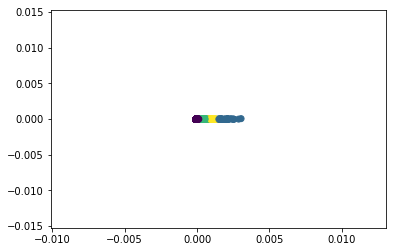

In [261]:
plt.scatter(pca_X[:,0],pca_X[:,1], c=agg.labels_)

In [262]:
X

array([[4.11522634e-06, 0.00000000e+00, 1.00000000e+00, 5.61167228e-07],
       [7.10666172e-06, 3.08985292e-07, 1.00000000e+00, 0.00000000e+00],
       [2.18023251e-04, 7.26744169e-06, 9.99999976e-01, 0.00000000e+00],
       ...,
       [3.39888322e-06, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.85081662e-06, 2.74032665e-07, 1.00000000e+00, 8.22097994e-07],
       [2.27793238e-06, 6.15657399e-08, 1.00000000e+00, 1.84697220e-07]])

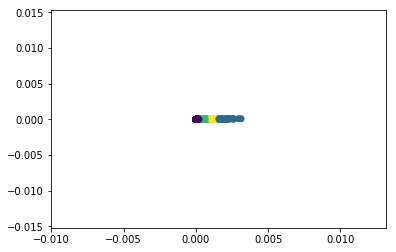

In [263]:
plt.scatter(X[:,0],X[:,1], c=agg.labels_)

In [264]:
from sklearn.linear_model import LogisticRegression

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [266]:
X_test.shape

(1203, 4)

In [267]:
lr = LogisticRegression().fit(X_train, y_train)

/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [268]:
from sklearn.metrics import classification_report, accuracy_score

In [273]:
#print(classification_report(y_test, lr.predict(X_test)))

In [274]:
accuracy_score(y_test, lr.predict(X_test))

0.7381546134663342

In [275]:
churn.columns

Index(['driver_id', 'onboard_week', 'churn', 'age', 'competitor', 'income',
       'suspensions'],
      dtype='object')

In [272]:
churn[['income', 'suspensions', 'churn']].corr()

,income,suspensions,churn
income,1.000000,0.163598,-0.316750
suspensions,0.163598,1.000000,-0.032563
churn,-0.316750,-0.032563,1.000000
